In [2]:
import czifile
from pathlib import Path
import os
import matplotlib.pyplot as plt
# import tifffile
import numpy as np
import cv2
from skimage import morphology
from skimage import segmentation
from skimage import exposure
from skimage import data
from skimage import color
from skimage import filters


channel_dict = {'DAPI': 0, 'gt':2, 'pho':3, 'hb':4}
archer = 27 # midsaggital slice variable

os.chdir('/Users/robinhood/Dropbox (HMS)/Data/imaging/processing')
czi = czifile.imread('wt_20210510_gthb_5.czi')
img=czi.squeeze()
img_DAPI=img[0,:,:,:]
max_projection_DAPI = img_DAPI.max(0)

(1024, 1024) bool


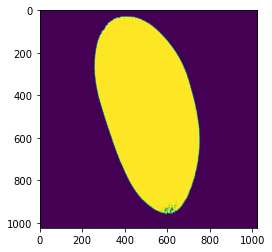

In [3]:
mask_emb = max_projection_DAPI > 500
plt.imshow(mask_emb)

print(mask_emb.shape, mask_emb.dtype)

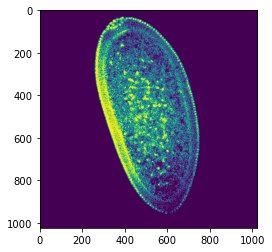

In [9]:
mask_emb2 = img_DAPI[27,:,:] > 500
plt.imshow(mask_emb2)

#mask does not work for mid embryo slices.

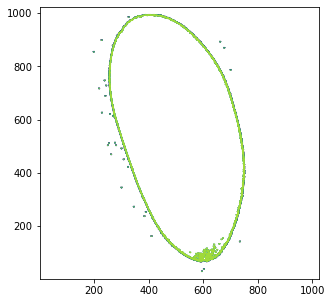

In [4]:
# using max_projection_hb, identify the dorsal/ventral axis


# make the computer create an ellipse from the mask and identify the long axis of the elipse
fig, ax = plt.subplots(figsize=(5, 5))
contour=ax.contour(mask_emb, origin='image')
plt.show()

# using max_projection_hb, identify which side of the ellipse has more signal (this will be the ventral side)

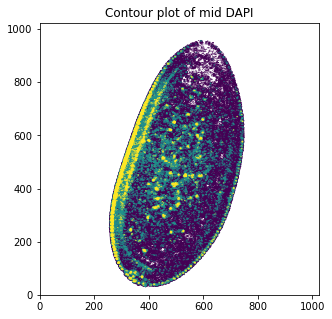

array([ 500.,  750., 1000.])

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
qcs = ax.contour(img_DAPI[27,:,:], levels=[500, 750, 1000])
ax.set_title('Contour plot of mid DAPI')
plt.show()

qcs.levels

331059


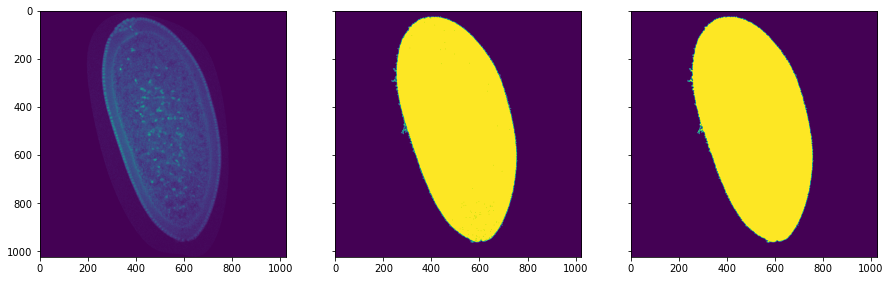

In [6]:

fig, axs = plt.subplots(1, 3, figsize=(15, 15), sharex=True, sharey=True)
#normalized = exposure.equalize_hist(img_DAPI[27,:,:])
normalized = exposure.adjust_gamma(img_DAPI[24,:,:])

hysterics = filters.apply_hysteresis_threshold(normalized,100, 1500)
closedwfriends=morphology.binary_closing(hysterics)

axs[0].imshow(normalized)
axs[1].imshow(hysterics)
axs[2].imshow(closedwfriends)
print(np.sum(closedwfriends))

#print(normalized.dtype)

#contour=axs[2].contour(hysterics, levels=[.69])
#plt.show()

(array([7.09625e+05, 3.15150e+04, 6.76180e+04, 9.56890e+04, 7.50940e+04,
        3.89360e+04, 1.69040e+04, 6.95100e+03, 3.20200e+03, 1.57700e+03,
        7.32000e+02, 3.71000e+02, 1.97000e+02, 8.60000e+01, 4.50000e+01,
        1.70000e+01, 8.00000e+00, 6.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([   0.  ,  144.25,  288.5 ,  432.75,  577.  ,  721.25,  865.5 ,
        1009.75, 1154.  , 1298.25, 1442.5 , 1586.75, 1731.  , 1875.25,
        2019.5 , 2163.75, 2308.  , 2452.25, 2596.5 , 2740.75, 2885.  ]),
 <BarContainer object of 20 artists>)

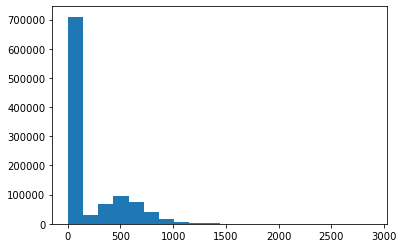

In [7]:

intensity=normalized.flatten()
plt.hist(intensity, bins=20)

In [ ]:
#deadend don't use:

boat=skimage.morphology.convex_hull_object(img_DAPI[24,:,:]>500)

fig = plt.figure(figsize=(50,150))
ax=fig.add_subplot(1,2,1)
plt.imshow(boat)

## Below are from early iterations when I was learning how to show images. I replaced it with cleaner script with a dictionary for less hardcoding. 

<class 'numpy.ndarray'> (5, 47, 1024, 1024) uint16


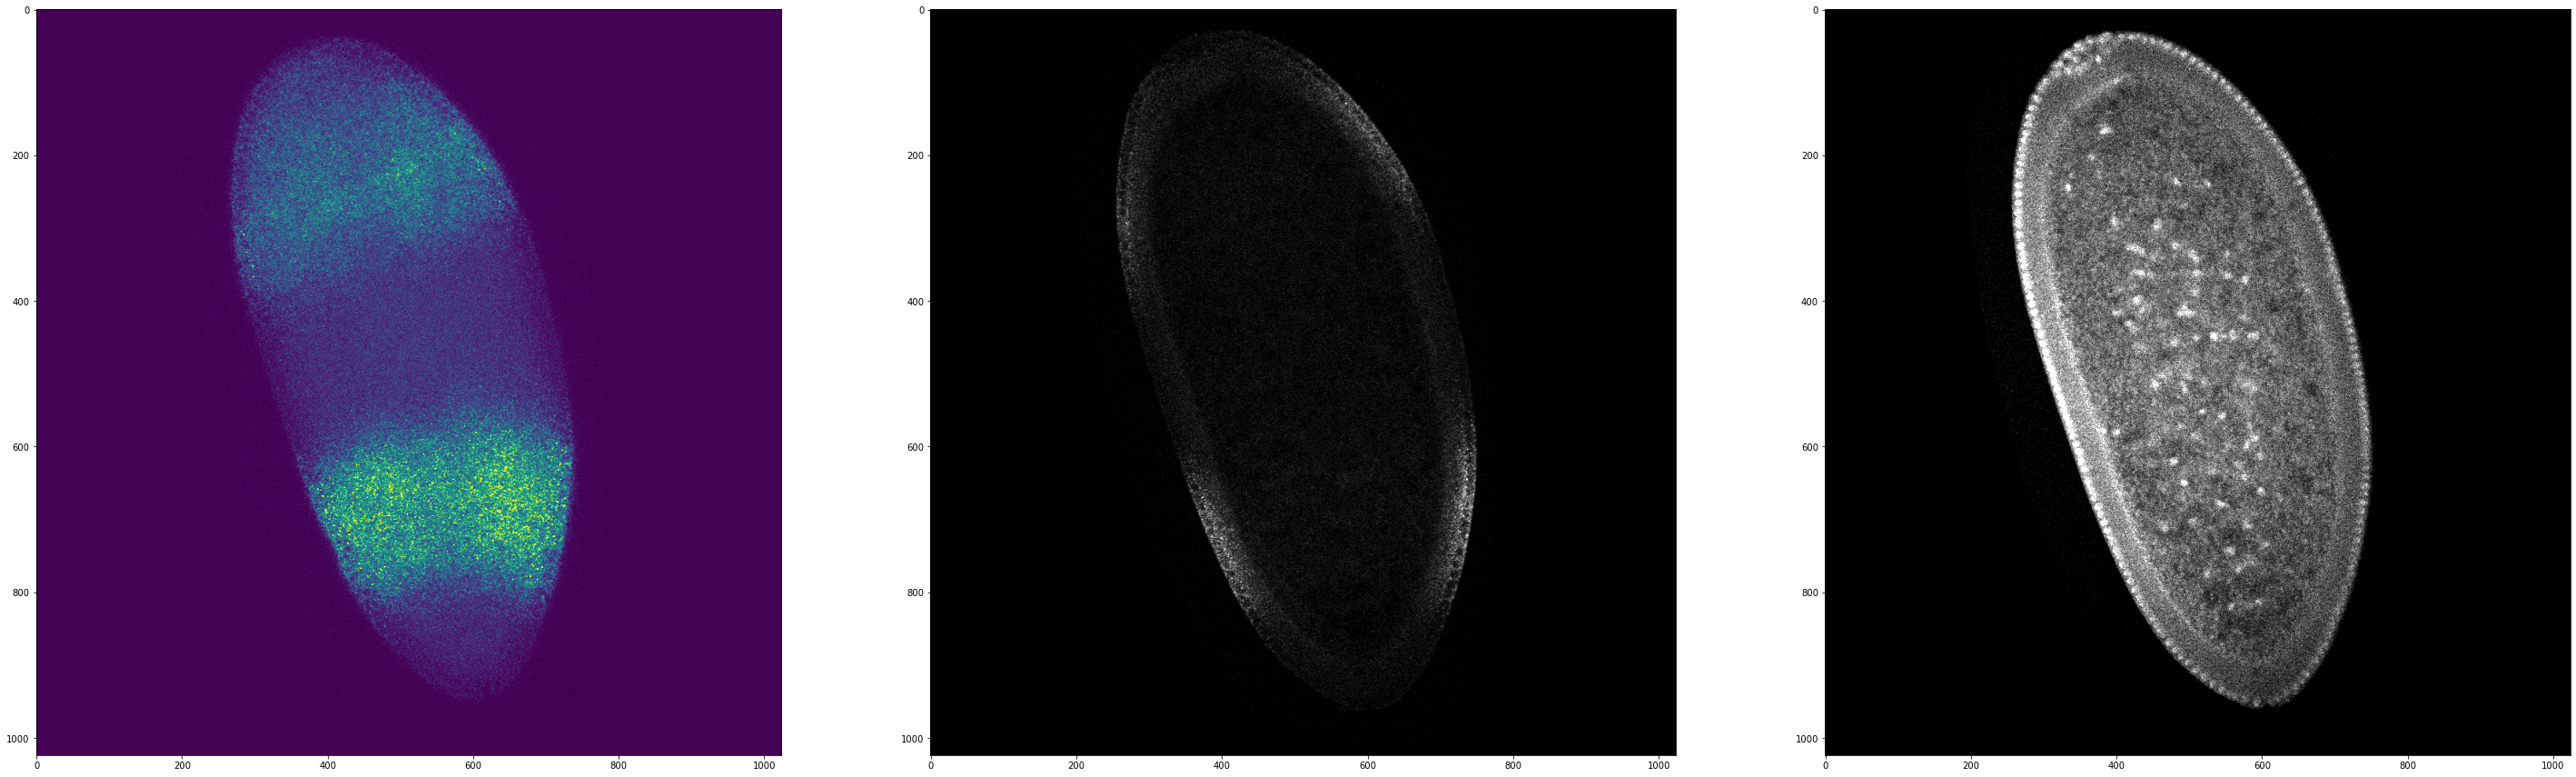

In [11]:

img=czi.squeeze()
print(type(img),img.shape,img.dtype)

fig=plt.figure(figsize=(50, 50)) 
ax=fig.add_subplot(1,3,1)
plt.imshow(czi.squeeze()[2,10,:,:], vmin=110, vmax=1000)


ax=fig.add_subplot(1,3,2)
plt.imshow(img[2,27,:,:], cmap='gray', vmin=110, vmax=1000) # colormap and contrast limits

ax=fig.add_subplot(1,3,3)
plt.imshow(img[0,27,:,:], cmap='gray', vmin=110, vmax=1000) # colormap and contrast limits
#plt.axis('off');  # remove axes

In [12]:

# I dont think there is necessarily enough signal here in to extract the data that I want. 
# perhaps therefore I need to make a max projection +/- 3 of the midsaggital slice. 
# 
midsag_DAPI = img[channel_dict['DAPI'],24:30,:,:]
midsag_gt = img[channel_dict['gt'],24:30,:,:]
midsag_hb =  img[channel_dict['hb'],24:30,:,:]

saggitarius_DAPI = midsag_DAPI.max(0)
saggitarius_gt =midsag_gt.max(0)
saggitarius_hb = midsag_hb.max(0)



ax=fig.add_subplot(1,3,3)
plt.imshow(saggitarius_hb, cmap='gray', vmin=110, vmax=4000)



NameError: name 'channel_dict' is not defined

In [14]:
#trying to make an ellipse and barking up the wrong tree

from skimage.measure import EllipseModel

xy = measure.EllipseModel().predict_xy(np.linspace(0, 2 * np.pi, 25), params=(10, 15, 4, 8, np.deg2rad(30)))
ellipse = EllipseModel()
ellipse.estimate(xy)

np.round(ellipse.params, 2)


np.round(abs(ellipse.residuals(xy)), 5)

#this just makes an ellipse, it doesn't fit it against anything

NameError: name 'measure' is not defined

In [ ]:
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 500
params.filterByCircularity = True 
params.minCircularity = 0.9
params.filterByConvexity = True
params.minConvexity = 0.2
params.filterByInertia = True
params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(closed.astype(np.uint8))


blank = np.zeros((1, 1)) 
blobs = cv2.drawKeypoints(closed.astype(np.uint8), keypoints, blank, (0, 0, 255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#see more here https://www.geeksforgeeks.org/find-circles-and-ellipses-in-an-image-using-opencv-python/
# it kept breaking my kernel


In [ ]:
# this requires all the regionprops values to run properly
# was an attempt to extract the lines into their own array- worked, but unncessary. 

fig, ax = plt.subplots()
ax.plot((x3, x1), (y3, y1), '-c', linewidth=2.5) #minor axis line

fig.canvas.draw()

minor = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
minor = minor.reshape(fig.canvas.get_width_height()[::-1] + (3,))

ax.plot((x4, x2), (y4, y2), '-m', linewidth=2.5) #major axis line
fig.canvas.draw()
major = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
major = minor.reshape(fig.canvas.get_width_height()[::-1] + (3,))